In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import ot

from functions import *
from noisy_graphs import *
from sample_graphs import *
from frank_wolfe import *
from grampa import *
from eigenalign import *
from isorank import *
from Electrical_network import *
from cuvature import *

In [57]:
n = 150
p = 0.6
s = 0.7 #correlation parameter
G, A = sample_Erdos_Renyi(n, p)
Gp = noisy_curvature_graph(G, p, s)
print("G =", G)
print("Gp = ", Gp)
Ap = nx.adjacency_matrix(Gp)

Ps = 1/n * np.ones((n, n))
A_eq, b_eq = bistochastic_equality_constraints(n)

G = Graph with 150 nodes and 6689 edges
Gp =  Graph with 150 nodes and 6772 edges


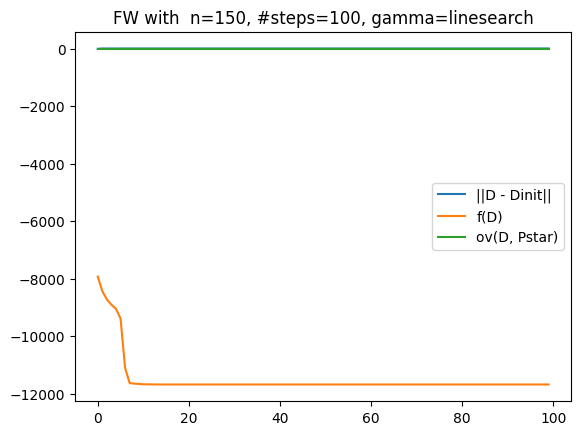

In [54]:
#Seems really efficient !! but slow ~36s for n = 100
D = faqplus(A, Ap, 100, Pstar=Ps ,plot=True)
Dp = project_to_perm(D, A_eq, b_eq)

57.445626465380286


np.float64(0.0)

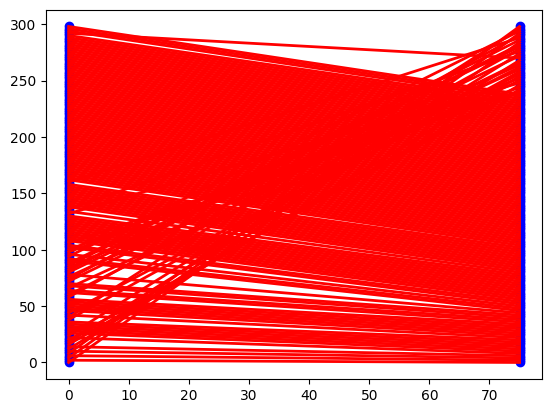

In [55]:
plot_alignment(G, Gp, Dp)
print(np.linalg.norm(A.toarray() - Dp @ Ap.toarray() @ Dp.T))
overlap(np.eye(n), Dp)

/home/ROCQ/argo/edailly/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


57.37595315112421
0.0
0.92


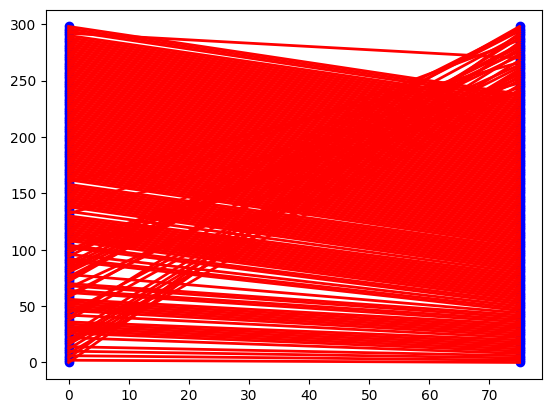

In [56]:
#results really depends on epsilon... = 0.1 bad, =0.01 good
#and on the correlation !!! there is a collapse threshold
#Really fast ! ~1s for n = 100
A = (A).astype(float)
Ap = (Ap).astype(float)
T = ot.gromov.entropic_gromov_wasserstein(A.toarray(), Ap.toarray(),epsilon=0.01, loss_fun='square_loss')
Tp = project_to_perm(T, A_eq, b_eq)
plot_alignment(G, Gp, Tp)
plt.plot()
print(np.linalg.norm(A.toarray() - Tp @ Ap.toarray() @ Tp.T))
print(overlap(Tp, np.eye(n)))
print(overlap(Tp, Dp))

97.88769074812215
0.013333333333333334


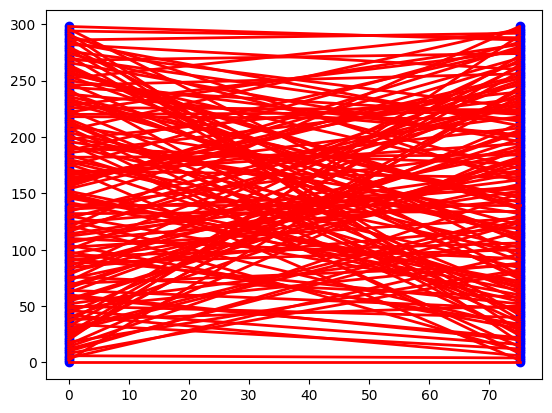

In [51]:
T = greedy_to_perm(T)
print(np.linalg.norm(A.toarray() - T @ Ap.toarray() @ T.T))
print(overlap(T, np.eye(n)))
plot_alignment(G, Gp, T)

103.29569206893383


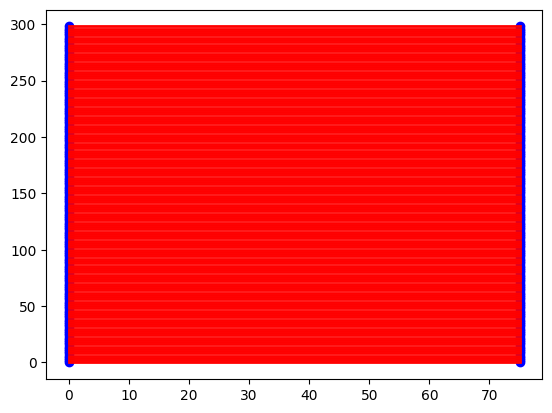

In [52]:
plot_alignment(G, Gp, np.eye(n))
print(np.linalg.norm(A.toarray() -  Ap.toarray() ))